# K Nearest Neighbours

Objective: Predict bill authentication    
Dataset: banking.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('bill_authen.csv')
print(data.shape)
data.head()

(1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Data Exploration

0    762
1    610
Name: Class, dtype: int64


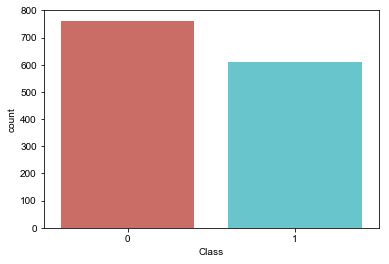

In [2]:
print(data['Class'].value_counts())

sns.countplot(x='Class',data = data, palette='hls',order = data['Class'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Correlation

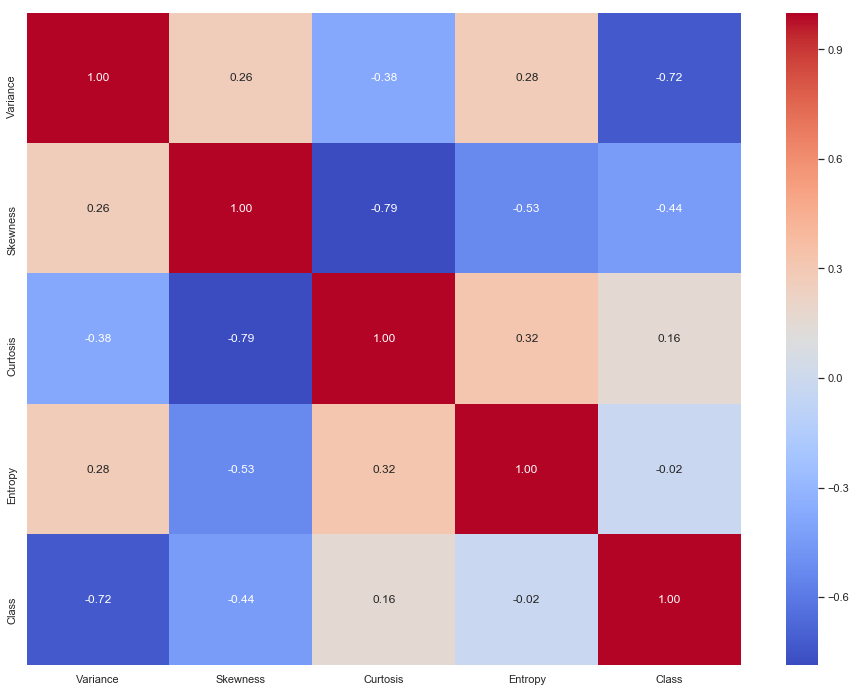

In [3]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [4]:
corr_rank = data.corr()
corr_rank["Class"].sort_values(ascending=False)

Class       1.000000
Curtosis    0.155883
Entropy    -0.023424
Skewness   -0.444688
Variance   -0.724843
Name: Class, dtype: float64

## Data Processing and Selection

In [5]:
X=data.iloc[:, :-1] #from 1st variable until 2nd last var
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1372, 4)


,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [6]:
y = data["Class"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (1372,)


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

## Data Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1372, 4)


array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744]])

## Split Train Test

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (1097, 4) (1097,)
X TEST Set :  (275, 4) (275,)


## K Nearest Neighbour

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#using loop to find the best accuracy and the best k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(np.round(mean_acc,4))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


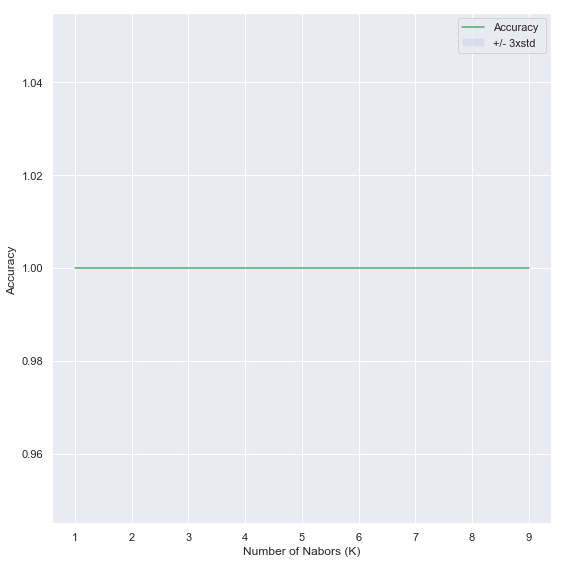

The best accuracy was 1.0 with k= 1


In [10]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", round(mean_acc.max(),4), "with k=", mean_acc.argmax()+1) 

In [11]:
k = 1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

print("Train set Accuracy: ", round(metrics.accuracy_score(y_train, neigh.predict(X_train)),4))
print("Test set Accuracy : ", round(metrics.accuracy_score(y_test, yhat),4))

Train set Accuracy:  1.0
Test set Accuracy :  1.0


## Test Prediction

In [12]:
df_pred1 = data[data.index == 1]
df_pred2 = data[data.index == 1300]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Variance,Skewness,Curtosis,Entropy,Class
1,4.5459,8.1674,-2.45860,-1.4621,0
1300,-2.3277,1.4381,-0.82114,-1.2862,1


In [13]:
Xp = df_pred.iloc[:, :-1]
yp = df_pred["Class"]
Xp = scaler.transform(Xp)

pred = neigh.predict(Xp)
pred

array([0, 1], dtype=int64)